### new_pixel = a * pixel_1 + b * pixel_2 + c

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

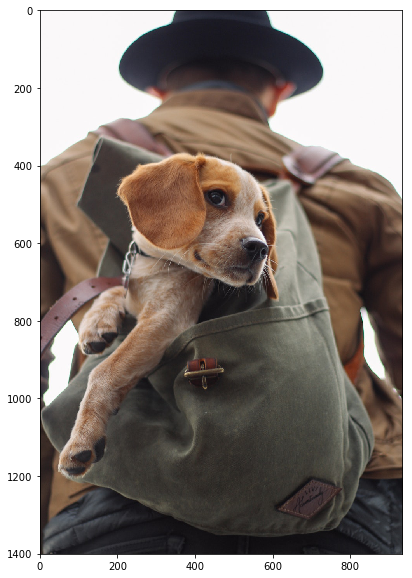

In [3]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(img1)

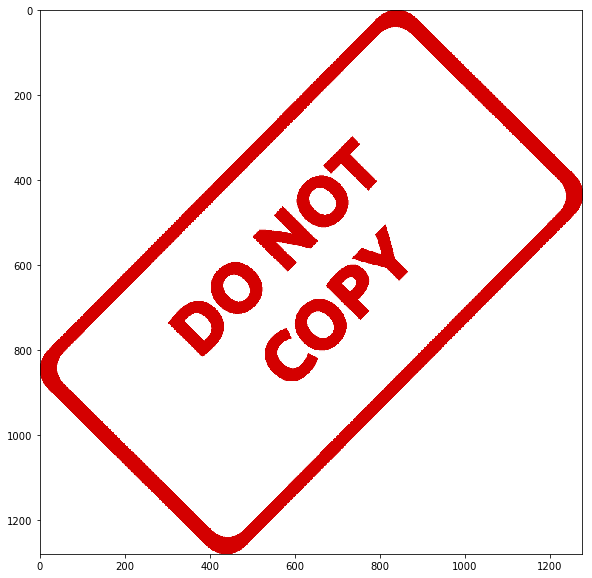

In [4]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(img2)

In [5]:
img1.shape

(1401, 934, 3)

In [6]:
img2.shape

(1280, 1277, 3)

### BLEDING IMAGES OF SAME SIZE

In [7]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

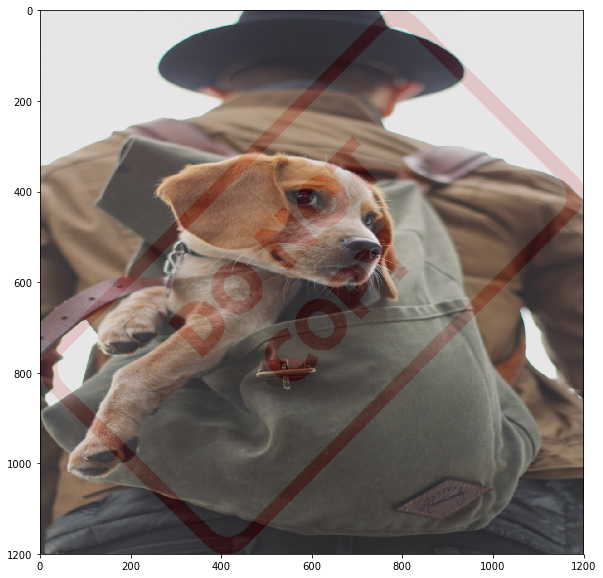

In [8]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.12,gamma=0) #only works with same size
fig = plt.figure(figsize=(18, 10))
plt.imshow(blended)

### OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE(NO BLENDING)

In [9]:
# with numpy assignments
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

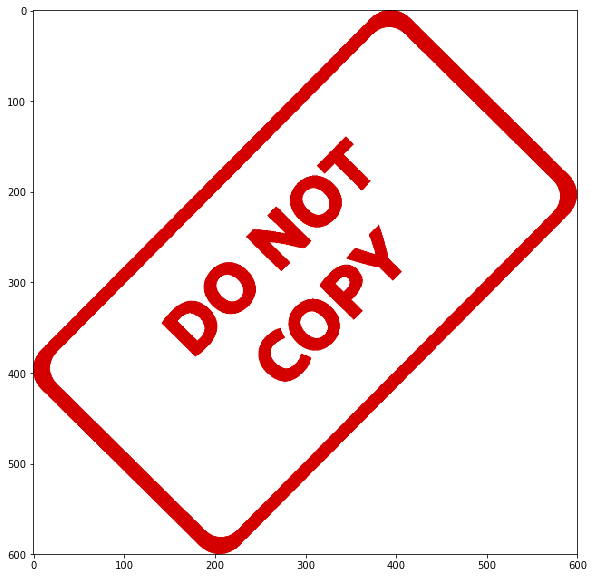

In [10]:
img2 = cv2.resize(img2, (600, 600))
fig = plt.figure(figsize=(18, 10))
plt.imshow(img2)

In [11]:
large_img = img1
small_img = img2

In [12]:
x_offset = 0
y_offset = 0

In [13]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [14]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

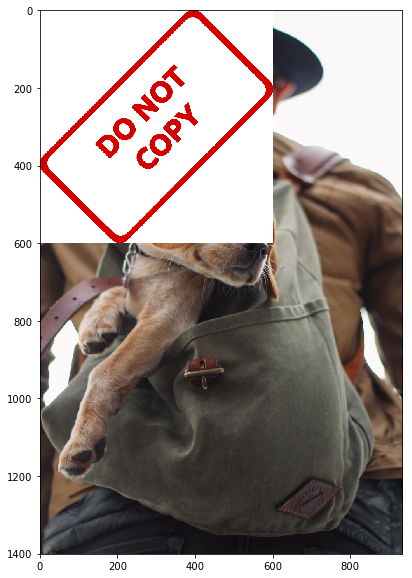

In [15]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(large_img)

### Masking on larger image (blend)

In [16]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [17]:
img2 = cv2.resize(img2, (600,600))

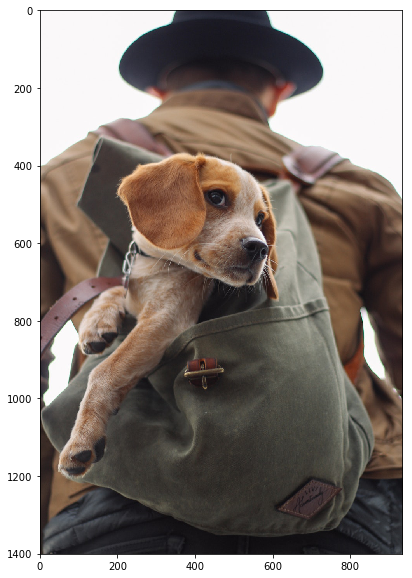

In [18]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(img1)

In [19]:
img1.shape

(1401, 934, 3)

In [20]:
x_offset = 934  - 600
y_offset = 1401 - 600

In [21]:
img2.shape

(600, 600, 3)

In [22]:
rows,cols,channels = img2.shape

In [23]:
rows

600

In [24]:
roi = img1[y_offset:1401, x_offset:943]

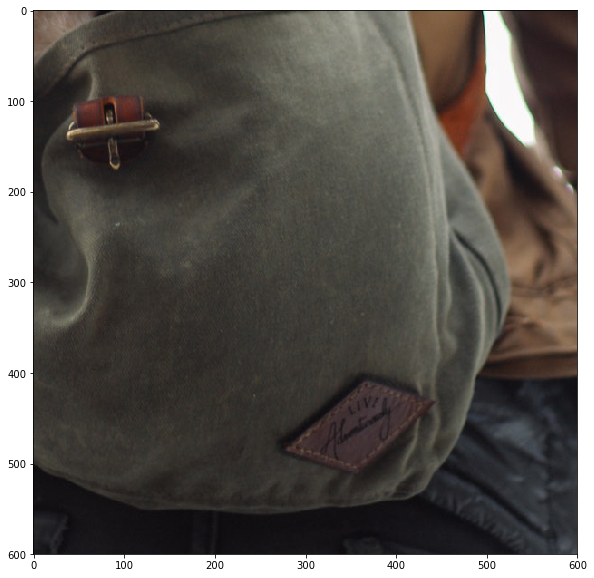

In [25]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(roi)

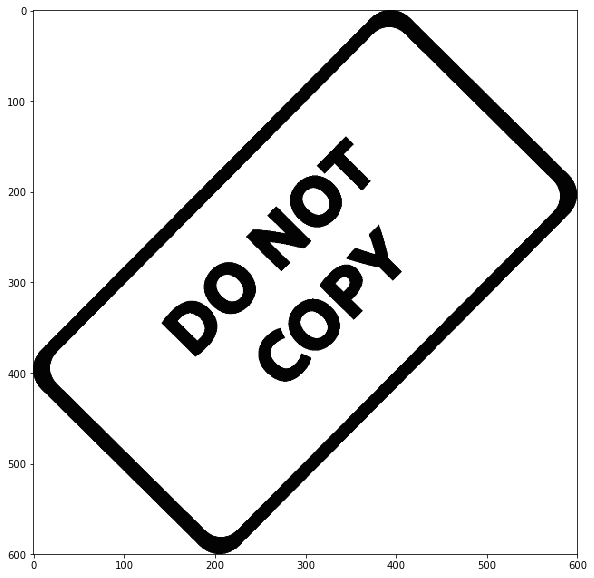

In [26]:
img2Gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(18, 10))
plt.imshow(img2Gray, cmap='gray')

In [27]:
mask_inv = cv2.bitwise_not(img2Gray)

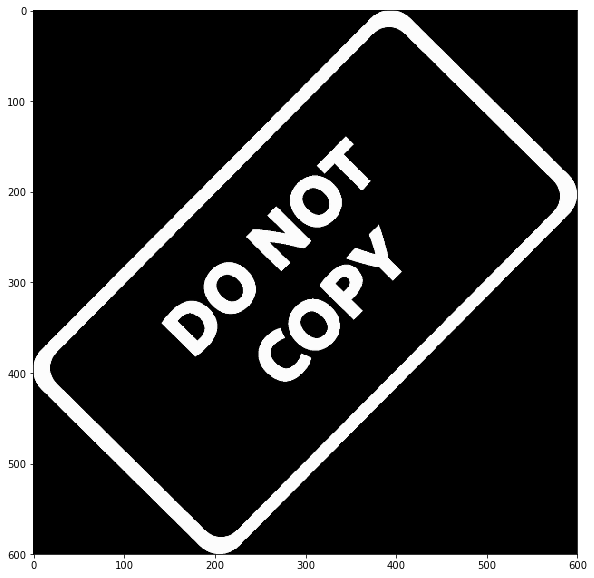

In [28]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(mask_inv, cmap='gray')

In [29]:
import numpy as np

In [30]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [31]:
white_background.shape

(600, 600, 3)

In [32]:
bk = cv2.bitwise_or(white_background, white_background, mask= mask_inv)

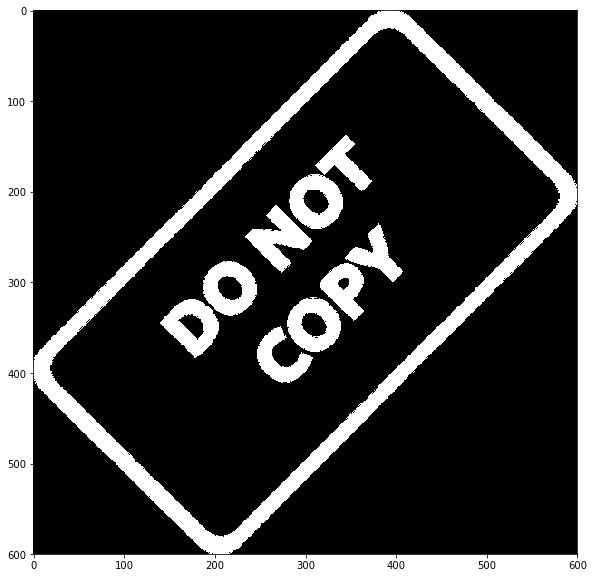

In [33]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(bk)

In [34]:
fg = cv2.bitwise_or(img2,img2, mask=mask_inv)

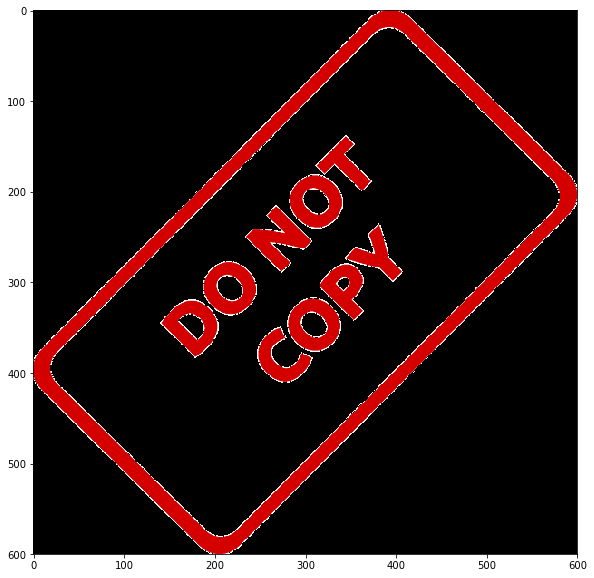

In [36]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(fg)

In [37]:
final_roi = cv2.bitwise_or(roi, fg)

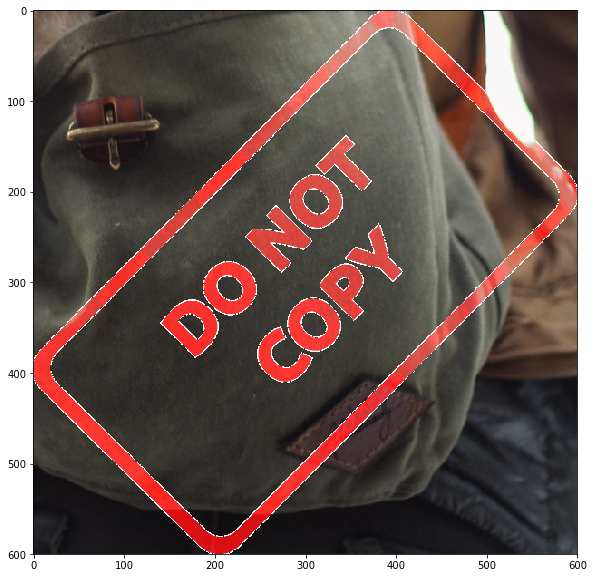

In [38]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(final_roi)

In [39]:
large_img = img1
small_img = final_roi

In [45]:
img1[ y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img[1] ] = small_img

TypeError: only integer scalar arrays can be converted to a scalar index

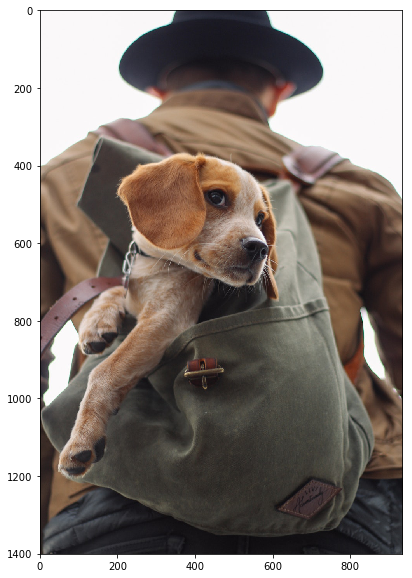

In [42]:
fig = plt.figure(figsize=(18, 10))
plt.imshow(large_img)